In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

### Importing data

In [2]:
# Data exported as csv from a google spreadsheet
df = pd.read_csv('data/april8-2020.csv')

# Show 1st record
# df.info()

df.shape

(189, 21)

##  Cleaning dataset
- Results by Region
- Results by Country

In [3]:
print('Null records: {}'.format(len(df[df['Region '].isnull()])))

Null records: 4


In [4]:
# Data cleaning: Region

df = df[df['Region '].notna()]
df['Region '].unique()

array(['ECA', 'MENA', 'North America', 'Asia', 'US', 'Africa', 'CSA',
       'CSA ', 'Africa ', 'Asia '], dtype=object)

In [5]:
# Clean Region column
df['Region '].replace({'US':'North America'}, inplace=True)
df['Region '].replace({'CSA ':'CSA'}, inplace=True)
df['Region '].replace({'Asia ':'Asia'}, inplace=True)
df['Region '].replace({'Africa ':'Africa'}, inplace=True)
df['Region '].unique()

array(['ECA', 'MENA', 'North America', 'Asia', 'Africa', 'CSA'],
      dtype=object)

In [6]:
df['Country'].unique()

array(['Turkey', 'Russia ', 'Israel', 'US', 'South Korea', 'South Korea ',
       nan, 'Singapore ', 'Taiwan', 'India ', 'Austria', 'Italy', 'Kenya',
       'South Africa', 'Bolivia', 'Brazil', 'Poland', 'Spain',
       'US (Israeli company)', 'Serbia', 'Ecuador', 'Colombia', 'UK',
       'Slovenia', 'Ukraine ', 'Azerbaijan', 'Hungary', 'Armenia',
       'Croatia', 'North Macedonia', 'Bulgaria', 'Bosnia', 'Moldova',
       'Kosovo', 'U.S. ', 'Canada', 'US ', 'Venezuela', 'Argentina',
       'Venezuela ', 'Peru', 'Dominican Republic', 'Aruba',
       'Dominican Republic ', 'Honduras', 'El Salvador', 'El Salvador ',
       'Trinidad & Tobago', 'Cuba', 'Nigeria', 'Niger', 'DRC', 'Tanzania',
       'Nigeria ', 'Ethiopia', 'Kenya ', 'Zimbabwe', 'Zambia', 'Cameroon',
       'Liberia ', 'Uganda', "Cote d'Ivoire ", 'Iran', 'Iran ', 'Egypt',
       'Jordan', 'China ', 'Philippines ', 'Malaysia', 'India',
       'Thailand', 'Bangladesh ', 'Liberia', 'Russian Federation'],
      dtype=object)

In [7]:
# Data cleaning: countries
df[df['Country'].isnull()]

,Region,Country,"City, Region",Description,Date (M.DD.Y),Link,Mention or use of false news measure (Y/N),Detained (Y/N),Arrested (Y/N),Imprisoned (Y/N),...,Chilling Statement (Y/N),Attacked (Y/N),Charged (Y/N),Online Harassment (Y/N),Threatened (Y/N),Death (Y/N),Surveillance (Y/N),Criminalization: type of new or amended law (please specify),Disinformation or propaganda (Y/N),Censorship
11,North America,NaN,NaN,Facebook sharing disease migration maps to hel...,NaN,https://www.wsj.com/articles/to-track-virus-go...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN


In [8]:
# Edit specific cells with null values in the country column

df.iloc[11][1] = 'US'
df.iloc[11]

Region                                                                                              North America
Country                                                                                                        US
City, Region                                                                                                  NaN
Description                                                     Facebook sharing disease migration maps to hel...
Date (M.DD.Y)                                                                                                 NaN
Link                                                            https://www.wsj.com/articles/to-track-virus-go...
Mention or use of false news measure (Y/N)                                                                    NaN
Detained (Y/N)                                                                                                NaN
Arrested (Y/N)                                                                          

In [9]:
# Cleaning countries column
df['Country'] = df['Country'].str.strip()

df['Country'].replace({'U.S.':'US'}, inplace=True)
df['Country'].replace({'US (Israeli company)':'US'}, inplace=True)
df['Country'].replace({'Russian Federation':'Russia'}, inplace=True)

list_countries = df['Country'].sort_values().unique()

print(len(list_countries))
print(df['Country'].sort_values().unique())

60
['Argentina' 'Armenia' 'Aruba' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Bolivia' 'Bosnia' 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'China'
 'Colombia' "Cote d'Ivoire" 'Croatia' 'Cuba' 'DRC' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Ethiopia' 'Honduras' 'Hungary' 'India'
 'Iran' 'Israel' 'Italy' 'Jordan' 'Kenya' 'Kosovo' 'Liberia' 'Malaysia'
 'Moldova' 'Niger' 'Nigeria' 'North Macedonia' 'Peru' 'Philippines'
 'Poland' 'Russia' 'Serbia' 'Singapore' 'Slovenia' 'South Africa'
 'South Korea' 'Spain' 'Taiwan' 'Tanzania' 'Thailand' 'Trinidad & Tobago'
 'Turkey' 'UK' 'US' 'Uganda' 'Ukraine' 'Venezuela' 'Zambia' 'Zimbabwe']


### Cleaned data summary: Region

185 valid records. Distribution by region:


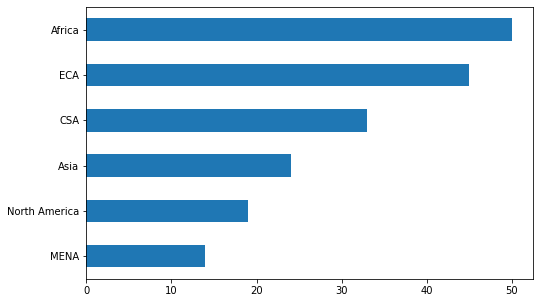

In [57]:
# Number of entries by region
df['Region '] = df['Region '].str.strip()
df['Region '].value_counts().sort_values().plot(kind='barh', figsize=(8,5))
print('{} valid records. Distribution by region:'.format(df['Region '].count()))

### Cleaned data summary: Countries

List of 9 countries out of 60 with more than 5 record in the database


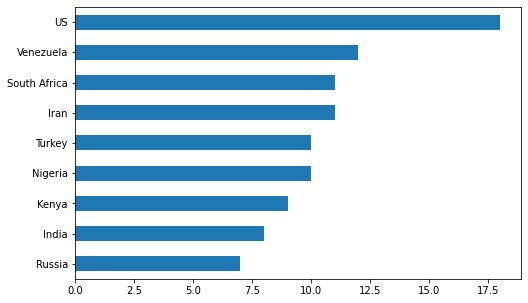

In [58]:
# Number of entries by country
countries = df['Country'].value_counts().sort_values(ascending = False)

i = 5

top_countries = countries[countries > i].sort_values()

top_countries.plot(kind='barh', figsize=(8,5))
print('List of {} countries out of {} with more than {} record in the database'.format(len(top_countries), len(list_countries), i))

### Columns formatting
- Needs to be reviewed. Calculation of number of tags gives error

In [12]:
# Rename columns
df.rename(columns={"Date (M.DD.Y)": "date", 
                   "Mention or use of false news measure (Y/N)": "false_news",
                   "Detained (Y/N)": "detained",
                   "Arrested (Y/N) ": "arrested",
                   "Imprisoned (Y/N) ": "imprisoned",
                   "Access Denied (Y/N)": "access_denied",
                   "Chilling Statement (Y/N)": "chilling_statement",
                   "Attacked (Y/N)": "attacked",
                   "Charged (Y/N) ": "charged",
                   "Online Harassment (Y/N)": "online_harassment",
                   "Threatened (Y/N)": "threatened",
                   "Death (Y/N)": "death",
                   "Criminalization: type of new or amended law (please specify)": "criminalization",
                   "Surveillance (Y/N)" : 'surveillance',
                   "Disinformation or propaganda (Y/N)": "disinformation_propaganda"}, inplace=True)

df.columns

Index(['Region ', 'Country', 'City, Region', 'Description', 'date', 'Link',
       'false_news', 'detained', 'arrested', 'imprisoned', 'access_denied',
       'chilling_statement', 'attacked', 'charged', 'online_harassment',
       'threatened', 'death', 'surveillance', 'criminalization',
       'disinformation_propaganda', 'Censorship'],
      dtype='object')

In [13]:
# List of columns to boolean
columns_to_boolean = ['false_news', 
                      'detained', 
                      'arrested', 
                      'imprisoned', 
                      'access_denied',
                      'chilling_statement',
                      'attacked',
                      'charged',
                      'online_harassment',
                      'threatened',
                      'death',
                      'surveillance',
                      'disinformation_propaganda']

In [21]:
def check_uniques_boolean(data, cols):
    for i in cols:
        print('{} : {} ({})'.format(i, data[i].nunique(), data[i].unique()))

In [22]:
check_uniques_boolean(df, columns_to_boolean)

false_news : 2 ([nan 'Y' 'y'])
detained : 3 (['Y' nan 'N' 'Y(?)'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'Y' 'N'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 3 ([nan 'y' 'Y' 'N'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'Y' 'N'])
threatened : 2 ([nan 'Y' 'N'])
death : 2 ([nan 'Y' 'N'])
surveillance : 3 ([nan 'Y ' 'Y' 'N'])
disinformation_propaganda : 4 ([nan 'Y' 'y' '?' 'N'])


In [27]:
for i in columns_to_boolean:
    #replace values
    df[i] = df[i].str.strip()
    df[i].replace({'y':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'?':'N'}, inplace=True)
    
# check again for uniques
check_uniques_boolean(df, columns_to_boolean)
    

false_news : 1 ([nan 'Y'])
detained : 2 (['Y' nan 'N'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'Y' 'N'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 2 ([nan 'Y' 'N'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'Y' 'N'])
threatened : 2 ([nan 'Y' 'N'])
death : 2 ([nan 'Y' 'N'])
surveillance : 2 ([nan 'Y' 'N'])
disinformation_propaganda : 2 ([nan 'Y' 'N'])


In [28]:
# Make columns boolean: 1/0
for i in columns_to_boolean:
    df[i] = df[i].apply(lambda x: 1 if x =='Y' else 0).astype('int32')
    
df[columns_to_boolean].sample(10)

,false_news,detained,arrested,imprisoned,access_denied,chilling_statement,attacked,charged,online_harassment,threatened,death,surveillance,disinformation_propaganda
57,0,0,0,0,0,0,1,0,0,0,0,0,0
159,1,0,0,0,0,1,0,0,0,0,0,0,0
146,1,0,0,0,0,0,0,0,0,0,0,0,0
117,1,0,1,0,0,0,0,0,0,0,0,0,0
40,0,1,0,0,0,0,0,1,0,1,0,0,0
66,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,1,0,0,1,0,0,0
119,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# PENDING: dates formatting
# df.date.unique()

### Sumary: additional classification

In [29]:
df[columns_to_boolean].nunique()

false_news                   2
detained                     2
arrested                     2
imprisoned                   2
access_denied                2
chilling_statement           2
attacked                     2
charged                      2
online_harassment            2
threatened                   2
death                        2
surveillance                 2
disinformation_propaganda    2
dtype: int64

In [30]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
tags

,0,1
false_news,154,31
detained,165,20
arrested,170,15
imprisoned,181,4
access_denied,179,6
chilling_statement,171,14
attacked,165,20
charged,178,7
online_harassment,177,8
threatened,166,19


Number of records with additional classification:


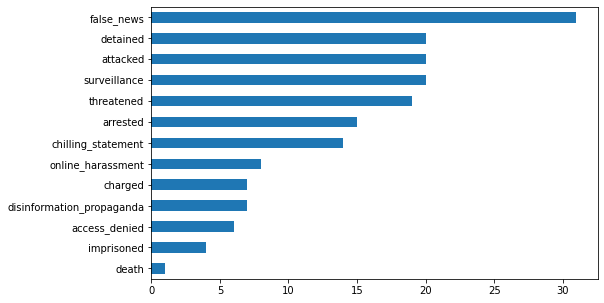

In [59]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
print("Number of records with additional classification:")
tags[1].sort_values(ascending = False)
tags[1].sort_values(ascending = False).sort_values().plot(kind='barh', figsize=(8,5))

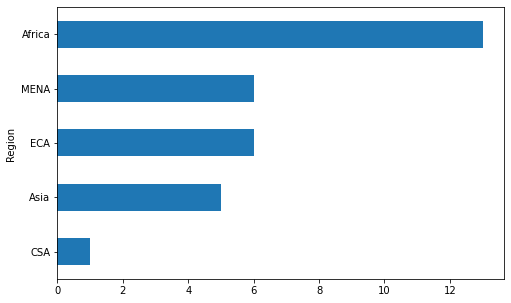

In [60]:
regions_false_news = df.loc[df['false_news'] == 1]

regions_false_news.groupby(['Region '])['false_news'].count().sort_values().plot(kind='barh', figsize=(8,5))

## Functions
- Filter by one or two columns, print summary data & table
- Calculate all combinations of boolean variables

In [61]:
# Filter data by one column
def filter_by_column(data, col):
    table = data.loc[data[col] == 1]
    
#     pd.set_option('display.max_colwidth', -1)
    
    print('\nThere are {} records classified as {}:\n'.format(len(table), col))
    print(table[['Country', 'Link']])
    
    print('\nDistribution by region')
    table['Region '].value_counts().plot(kind='barh', figsize=(8,5))
    

In [62]:
# Filter data by two columns
def filter_by_two_columns(data, col1, col2):
    table = data.loc[(data[col1] == 1) & (data[col2] == 1)]
    try:
        print('\nThere are {} records classified as {} and {}:\n'.format(len(table), col1, col2))
        print(table[['Country', 'Link']])  
#         print('\nDistribution by country')
#         table['Country'].value_counts().plot(kind='barh', figsize=(10,5))
    
    except IndexError:
        print('No results')
        pass


### Summary: disinformation_propaganda


There are 7 records classified as disinformation_propaganda:

     Country                                               Link
32   Ukraine  https://www.buzzfeednews.com/article/christoph...
33    Russia  https://www.theguardian.com/world/2020/mar/18/...
36   Armenia  https://eurasianet.org/armenia-takes-hard-line...
74        US  https://www.nytimes.com/2020/03/28/us/testing-...
76        US  https://www.journalism.org/2020/03/18/american...
167    China  https://www.propublica.org/article/how-china-b...
170   Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...

Distribution by region


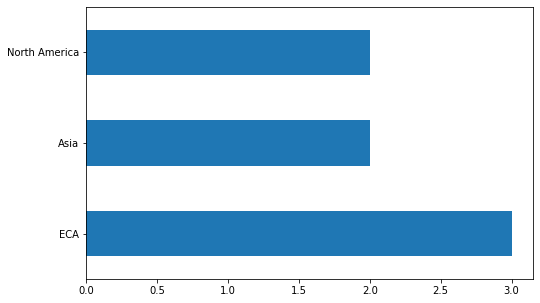

In [63]:
filter_by_column(df, 'disinformation_propaganda')


There are 20 records classified as surveillance:

          Country                                               Link
1          Russia   https://news.trust.org/item/20200221114452-s7xez
2          Israel  https://www.bloomberg.com/news/articles/2020-0...
4              US  https://science.slashdot.org/story/20/03/17/21...
5              US  https://www.technologyreview.com/s/615372/coro...
7     South Korea  https://www.technologyreview.com/s/615329/coro...
8     South Korea  https://www.washingtonpost.com/world/asia_paci...
9     South Korea  https://www.wsj.com/articles/how-china-slowed-...
11             US  https://www.wsj.com/articles/to-track-virus-go...
13      Singapore  https://www.wsj.com/articles/how-china-slowed-...
14         Taiwan  https://www.wsj.com/articles/how-china-slowed-...
21        Bolivia  https://www.lavanguardia.com/politica/20200318...
22         Brazil  https://www.uol.com.br/tilt/noticias/redacao/2...
23         Poland  https://privacyinternational.org/

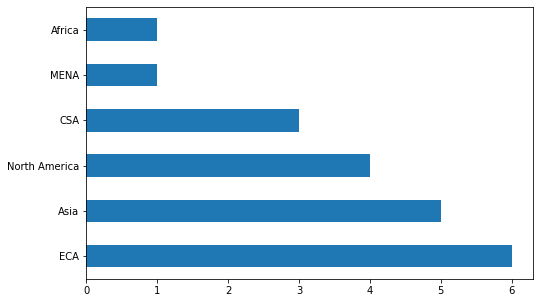

In [64]:
filter_by_column(df, 'surveillance')


There are 31 records classified as false_news:

                Country                                               Link
25               Russia  https://www.france24.com/en/20200324-100-000-c...
35              Hungary  https://www.nytimes.com/2020/03/30/world/europ...
36              Armenia  https://eurasianet.org/armenia-takes-hard-line...
48               Serbia  https://balkaninsight.com/2020/04/02/serbian-r...
51               Russia  https://apnews.com/dbbf02a747b11d8ffe3b07d5e33...
59              Moldova  https://balkaninsight.com/2020/03/31/battling-...
98   Dominican Republic  https://listindiario.com/la-republica/2020/03/...
108             Nigeria  https://www.legit.ng/1298893-coronavirus-court...
109               Niger  https://twitter.com/CPJAfrica/status/123848961...
110               Kenya  https://www.africanews.com/2020/03/16/media-wa...
112        South Africa  https://twitter.com/Dariomilo/status/124038234...
113               Kenya  https://www.nation.co.ke/n

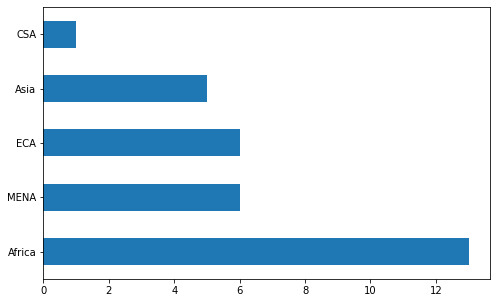

In [65]:
filter_by_column(df, 'false_news')

In [66]:
# Filter data by two columns
filter_by_two_columns(df, 'disinformation_propaganda', 'false_news')


There are 2 records classified as disinformation_propaganda and false_news:

     Country                                               Link
36   Armenia  https://eurasianet.org/armenia-takes-hard-line...
170   Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...


## Clustering

In [67]:
# columns with boolean values
d = df[columns_to_boolean]


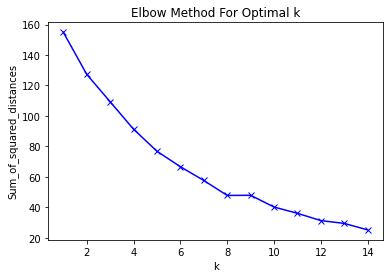

In [68]:
# Determining the number of clusters in the dataset
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical clustering

In [69]:
#pending

### K-means clustering

In [70]:
#Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Fit clusterer
clusters.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
df['group'] = clusters.predict(d)

In [72]:
df.group.unique()

array([5, 0, 3, 1, 2, 4], dtype=int32)

In [73]:
df.group.value_counts()

3    94
1    30
2    20
0    20
5    16
4     5
Name: group, dtype: int64

In [74]:
df[(df['group'] == 4)]

,Region,Country,"City, Region",Description,date,Link,false_news,detained,arrested,imprisoned,...,attacked,charged,online_harassment,threatened,death,surveillance,criminalization,disinformation_propaganda,Censorship,group
49,ECA,Serbia,Belgrade,Government severly restricts flow of informati...,1.4.2020,https://balkaninsight.com/2020/04/01/serbian-g...,0,0,0,1,...,0,0,0,0,0,0,,0,NaN,4
77,CSA,Venezuela,NaN,Socorro has been target of coordinated state t...,3.0.2020,https://twitter.com/MilagrosSocorro/status/123...,0,0,0,0,...,0,0,1,0,0,0,NaN,0,NaN,4
175,Asia,India,"Hyderabad, Telangana",Police in Hyderabad also beat and insulted Men...,3.23.2020,https://www.siasat.com/journalist-unions-lodge...,0,0,0,1,...,0,0,1,0,0,0,NaN,0,NaN,4
176,Asia,India,"Hyderabad, Telangana","Police in Hyderabad hit Mohammed Hussain, a re...",3.23.2020,https://twitter.com/writetohussain/status/1242...,0,0,0,1,...,0,0,1,0,0,0,NaN,0,NaN,4
179,Asia,India,"Thane, Maharashtra",ETV deputy news editor Uttkarsh Chaturvedi was...,3.26.2020,https://www.rediff.com/news/report/tv-journali...,0,0,0,1,...,0,0,1,0,0,0,NaN,0,NaN,4
